In [43]:
#Importing Libraries

In [44]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D

from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

In [45]:
#Extract Filenames from Folder

In [46]:
filenames = []
for file in os.listdir('images'):
    filenames.append(os.path.join('images',file))
    

In [47]:
len(filenames)

44441

In [48]:
#Importing ResNet50 Model and Cofiguration

In [49]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.trainable = False

model = tf.keras.models.Sequential([model,
                                   GlobalMaxPool2D()
                                   ])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d_2 (Gl  (None, 2048)              0         
 obalMaxPooling2D)                                               
                                                                 
Total params: 23587712 (89.98 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [50]:
#Extracting Fetaures from Image

In [51]:
img = image.load_img('16871.jpg', target_size=(224,224))
img_array = image.img_to_array(img)
img_expand_dim = np.expand_dims(img_array, axis=0)
img_preprocess = preprocess_input(img_expand_dim)
result = model.predict(img_preprocess).flatten()
norm_result = result/norm(result)
norm_result

1/1 [==============================] - 2s 2s/step


array([0.        , 0.00295302, 0.        , ..., 0.00752505, 0.02113523,
       0.00401741], dtype=float32)

In [52]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    return norm_result

In [53]:
extract_features_from_images(filenames[0], model)

1/1 [==============================] - 0s 75ms/step


array([0.        , 0.01761619, 0.00171596, ..., 0.01247231, 0.02726381,
       0.06899218], dtype=float32)

In [56]:
image_features = []
for file in filenames[0:5]:
    image_features.append(extract_features_from_images(file, model))
image_features

1/1 [==============================] - 0s 57ms/step


[array([0.        , 0.01761619, 0.00171596, ..., 0.01247231, 0.02726381,
        0.06899218], dtype=float32),
 array([0.        , 0.03648942, 0.        , ..., 0.00997929, 0.02375531,
        0.04649909], dtype=float32),
 array([0.        , 0.03642137, 0.00710439, ..., 0.00140775, 0.        ,
        0.05435045], dtype=float32),
 array([0.00232164, 0.05030543, 0.00747742, ..., 0.00346696, 0.03391022,
        0.04565722], dtype=float32),
 array([0.00306835, 0.06240455, 0.        , ..., 0.00170629, 0.02032896,
        0.05833264], dtype=float32)]

In [60]:
Image_features = pkl.dump(image_features, open('Images_features.pkl','wb'))

In [61]:
filenames = pkl.dump(filenames, open('filenames.pkl','wb'))

In [62]:
#Loading Pickle Files

In [69]:
Image_features = pkl.load(open('Images_features.pkl','rb'))

In [94]:
filenames = pkl.load(open('filenames.pkl','rb'))

In [95]:
np.array(Image_features).shape

(44441, 2048)

In [96]:
#Finidng Simialar Images

In [97]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')

In [98]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [99]:
input_image = extract_features_from_images('16871.jpg',model)

1/1 [==============================] - 0s 72ms/step


In [100]:
distance,indices = neighbors.kneighbors([input_image])

In [101]:
indices[0]

array([ 5828,  5799, 34267, 16489,  6257,  5814], dtype=int64)

In [102]:
from IPython.display import Image

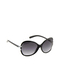

In [103]:
Image('16871.jpg')

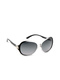

In [106]:
Image(filenames[indices[0][1]])

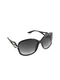

In [107]:
Image(filenames[indices[0][2]])

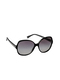

In [108]:
Image(filenames[indices[0][3]])

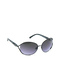

In [109]:
Image(filenames[indices[0][4]])

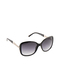

In [110]:
Image(filenames[indices[0][5]])